In [1]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
import pandas as pd
import glob

In [2]:
# joined_files = os.path.join("/Users/afox/Jedi/Jedi_experiments/OWP_obs/2021/202101", "wdb0_obs_swe_snwd_target_*.csv")
joined_files = os.path.join("/Users/afox/Downloads/2021/202101", "wdb0_obs_swe_snwd_target_*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)


In [3]:
df.set_index("variable_name", inplace = True)
swe_obs = df.loc[["snow_water_equivalent_mm"], ["latitude", "longitude", "ObsValue"]]

depth_obs = df.loc[["snow_depth_m"], ["latitude", "longitude", "ObsValue"]]


In [4]:
output = swe_obs.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})
numobs = len(output)

obarray = np.empty([numobs, 3])

obarray[:, 0] = output["count"]
obarray[:, 1] = output["longitude"]
obarray[:, 2] = output["latitude"]

obarray_toplot = obarray[obarray[:,2]<50.0] # Remove AK and Canada 
obarray_toplot = obarray_toplot[obarray_toplot[:,1]<-75.0]

cmax = np.amax(obarray[:,0])
cmin = 0.0
cmap = 'viridis'

# Subset obs to specific domain
# lat_max = 41.0
# lat_min = 37.0
# lon_max = -102.0
# lon_min = -109.4
# obarray_toplot = obarray_toplot[obarray_toplot[:,2]<lat_max]
# obarray_toplot = obarray_toplot[obarray_toplot[:,2]>lat_min]
# obarray_toplot = obarray_toplot[obarray_toplot[:,1]<lon_max]
# obarray_toplot = obarray_toplot[obarray_toplot[:,1]>lon_min]

savename = "OWP_SWE_obs_conus"

 Saving figure as OWP_SWE_obs_conus 



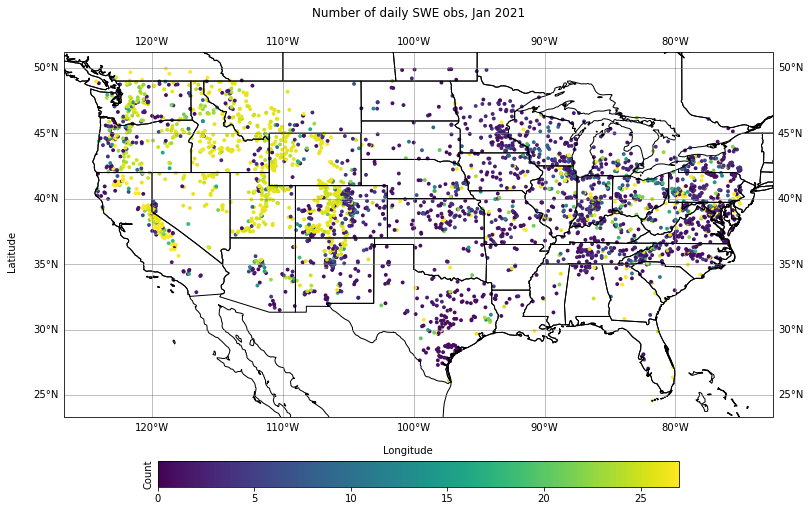

In [5]:
# Create figure
# -------------
fig = plt.figure(figsize=(15, 8))

# initialize the plot pointing to the projection
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
#gl.xlocator = mticker.FixedLocator(
#    [-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.set_ylabel("Latitude",  fontsize=7)
ax.set_xlabel("Longitude", fontsize=7)

ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
sc = ax.scatter(obarray_toplot[:, 1], obarray_toplot[:, 2],
                c=obarray_toplot[:, 0], s=15, linewidth=0,
                transform=ccrs.PlateCarree(), cmap=cmap, vmin=cmin, vmax=cmax)

# colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
cbar.ax.set_ylabel("Count", fontsize=10)

# plot globally
#ax.set_global()

# draw coastlines
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)

# figure labels
plt.title("Number of daily SWE obs, Jan 2021", y=1.08)
ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes,
        rotation='vertical', va='bottom')

# show plot
print(" Saving figure as", savename, "\n")
plt.savefig(savename, facecolor='w', dpi = 400)

In [6]:
output = depth_obs.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})
numobs = len(output)

obarray = np.empty([numobs, 3])

obarray[:, 0] = output["count"]
obarray[:, 1] = output["longitude"]
obarray[:, 2] = output["latitude"]

obarray_toplot = obarray[obarray[:,2]<50.0] # Remove AK and Canada 
obarray_toplot = obarray_toplot[obarray_toplot[:,1]<-75.0]

cmax = np.amax(obarray[:,0])
cmin = 0.0
cmap = 'viridis'

# Subset obs to specific domain
# lat_max = 41.0
# lat_min = 37.0
# lon_max = -102.0
# lon_min = -109.4
# obarray_toplot = obarray_toplot[obarray_toplot[:,2]<lat_max]
# obarray_toplot = obarray_toplot[obarray_toplot[:,2]>lat_min]
# obarray_toplot = obarray_toplot[obarray_toplot[:,1]<lon_max]
# obarray_toplot = obarray_toplot[obarray_toplot[:,1]>lon_min]

savename = "OWP_depth_obs_conus"

 Saving figure as OWP_depth_obs_conus 



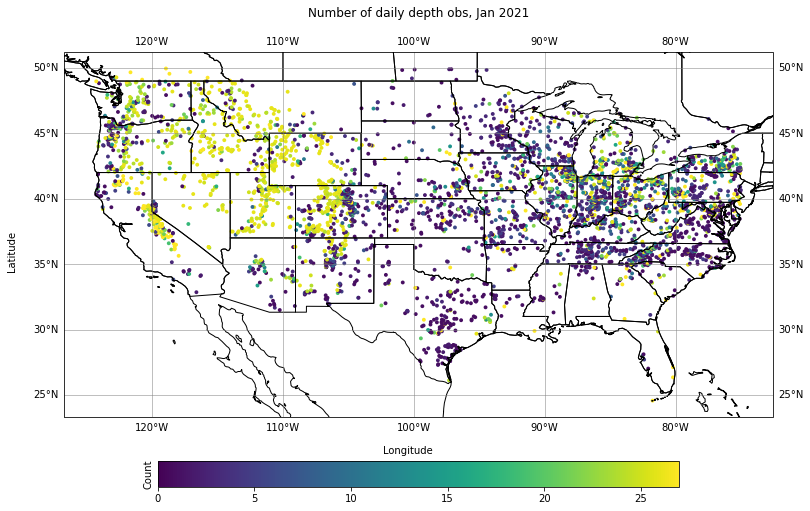

In [7]:
# Create figure
# -------------
fig = plt.figure(figsize=(15, 8))

# initialize the plot pointing to the projection
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
#gl.xlocator = mticker.FixedLocator(
#    [-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.set_ylabel("Latitude",  fontsize=7)
ax.set_xlabel("Longitude", fontsize=7)

ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
sc = ax.scatter(obarray_toplot[:, 1], obarray_toplot[:, 2],
                c=obarray_toplot[:, 0], s=15, linewidth=0,
                transform=ccrs.PlateCarree(), cmap=cmap, vmin=cmin, vmax=cmax)

# colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
cbar.ax.set_ylabel("Count", fontsize=10)

# plot globally
#ax.set_global()

# draw coastlines
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)

# figure labels
plt.title("Number of daily depth obs, Jan 2021", y=1.08)
ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes,
        rotation='vertical', va='bottom')

# show plot
print(" Saving figure as", savename, "\n")
plt.savefig(savename, facecolor='w', dpi = 400)